In [ ]:
import numpy as np  # Importe la bibliothèque NumPy, utilisée pour la manipulation de matrices et d'opérations mathématiques avancées.
import pandas as pd  # Importe la bibliothèque pandas, qui permet de charger et de manipuler des données sous forme de DataFrame (tableaux de données).
from sklearn.feature_extraction import text  # Importe le module de transformation de texte de scikit-learn, qui inclut des outils pour vectoriser du texte.
from sklearn.metrics.pairwise import cosine_similarity  # Importe la fonction cosine_similarity pour calculer la similarité cosinus entre des vecteurs.

data = pd.read_csv("netflixData.csv")  # Charge les données à partir d'un fichier CSV nommé 'netflixData.csv' dans un DataFrame pandas.
print(data.head())  # Affiche les 5 premières lignes du DataFrame pour un aperçu rapide des données.


                                Show Id                          Title  \
0  cc1b6ed9-cf9e-4057-8303-34577fb54477                       (Un)Well   
1  e2ef4e91-fb25-42ab-b485-be8e3b23dedb                         #Alive   
2  b01b73b7-81f6-47a7-86d8-acb63080d525  #AnneFrank - Parallel Stories   
3  b6611af0-f53c-4a08-9ffa-9716dc57eb9c                       #blackAF   
4  7f2d4170-bab8-4d75-adc2-197f7124c070               #cats_the_mewvie   

                                         Description  \
0  This docuseries takes a deep dive into the luc...   
1  As a grisly virus rampages a city, a lone man ...   
2  Through her diary, Anne Frank's story is retol...   
3  Kenya Barris and his family navigate relations...   
4  This pawesome documentary explores how our fel...   

                      Director  \
0                          NaN   
1                       Cho Il   
2  Sabina Fedeli, Anna Migotto   
3                          NaN   
4             Michael Margolis   

             

In [ ]:
print(data.isnull().sum())

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64


In [ ]:
data = data[["Title", "Description", "Content Type", "Genres"]]
print(data.head())

                           Title  \
0                       (Un)Well   
1                         #Alive   
2  #AnneFrank - Parallel Stories   
3                       #blackAF   
4               #cats_the_mewvie   

                                         Description Content Type  \
0  This docuseries takes a deep dive into the luc...      TV Show   
1  As a grisly virus rampages a city, a lone man ...        Movie   
2  Through her diary, Anne Frank's story is retol...        Movie   
3  Kenya Barris and his family navigate relations...      TV Show   
4  This pawesome documentary explores how our fel...        Movie   

                                           Genres  
0                                      Reality TV  
1  Horror Movies, International Movies, Thrillers  
2             Documentaries, International Movies  
3                                     TV Comedies  
4             Documentaries, International Movies  


In [ ]:
data = data.dropna()

La fonction clean est utilisée pour nettoyer les textes en préparation à une analyse plus approfondie, comme le calcul de similarités textuelles, la vectorisation TF-IDF ou d'autres techniques de traitement du langage naturel (NLP). Cela améliore la qualité des données textuelles en éliminant le bruit (comme la ponctuation, les liens, et les stopwords) et en simplifiant les mots à leur forme la plus essentielle.

In [ ]:
import nltk  # Importation de la bibliothèque pour le traitement du langage naturel
import re  # Importation de la bibliothèque pour les expressions régulières
nltk.download('stopwords')  # Téléchargement des mots vides (stopwords) en anglais
stemmer = nltk.SnowballStemmer("english")  # Initialisation de l'outil pour réduire les mots à leur racine
from nltk.corpus import stopwords  # Importation de l'ensemble des stopwords
import string  # Importation de la bibliothèque pour gérer la ponctuation
stopword = set(stopwords.words('english'))  # Récupération des stopwords dans un ensemble

def clean(text):
    text = str(text).lower()  # Conversion du texte en minuscules
    text = re.sub('\[.*?\]', '', text)  # Suppression de tout ce qui est entre crochets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Suppression des liens web
    text = re.sub('<.*?>+', '', text)  # Suppression des balises HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Suppression de la ponctuation
    text = re.sub('\n', '', text)  # Suppression des sauts de ligne
    text = re.sub('\w*\d\w*', '', text)  # Suppression des mots contenant des chiffres
    text = [word for word in text.split(' ') if word not in stopword]  # Suppression des stopwords
    text = " ".join(text)  # Recomposition du texte en une chaîne de caractères
    text = [stemmer.stem(word) for word in text.split(' ')]  # Réduction des mots à leur racine
    text = " ".join(text)  # Recomposition à nouveau du texte
    return text

data["Title"] = data["Title"].apply(clean)  # Application de la fonction clean sur la colonne "Title" du DataFrame data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Conversion en minuscules : Cela permet d'uniformiser le texte, car "Book" et "book" seront désormais considérés comme la même chose.

Suppression de contenu entre crochets : Supprime les annotations ou informations non pertinentes présentes dans le texte (comme des références bibliographiques).

Suppression des liens : Les URL ne sont pas utiles pour l'analyse de texte et doivent être supprimées.

Suppression des balises HTML : Si le texte contient du HTML (par exemple, après extraction depuis une page web), ces balises sont éliminées.

Suppression de la ponctuation : Les symboles de ponctuation ne sont généralement pas utiles dans l'analyse sémantique.

Suppression des sauts de ligne : Les lignes vides sont éliminées pour éviter de fausser l'analyse du texte.

Suppression des mots contenant des chiffres : Parfois, les mots avec des chiffres (comme "book123") ne sont pas pertinents pour l'analyse textuelle.
Suppression des stopwords : Les mots vides sont filtrés car ils n'ajoutent pas de sens utile au texte.

Réduction des mots à leur racine (stemming) : Cela permet de réduire les variantes des mots à leur forme de base, ce qui simplifie l'analyse du texte en regroupant des mots similaires.

Recomposition du texte : Après avoir transformé chaque mot, le texte est recomposé en une chaîne de caractères pour une utilisation future.

In [ ]:
print(data.Title.sample(10))

5714                        warrior
5580                  uncl naji uae
2600                la ley de herod
3259                      must love
4189                       sex educ
2904    maharaja stori ranjit singh
2281                     invis citi
5608                        unknown
2786                    lost london
1502         enissa amani ehrenwort
Name: Title, dtype: object


In [ ]:
# Convertir la colonne "Genres" en une liste de chaînes de caractères
feature = data["Genres"].tolist()#pas necessaire voir que ça marche

# Importation de l'outil TfidfVectorizer pour convertir le texte en une matrice de TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialisation du TfidfVectorizer en spécifiant les mots vides en anglais
tfidf = TfidfVectorizer(stop_words="english")

# Transformation de la liste de genres en une matrice TF-IDF
tfidf_matrix = tfidf.fit_transform(feature)

# Importation de la fonction cosine_similarity pour calculer la similarité cosinus entre les documents
from sklearn.metrics.pairwise import cosine_similarity

# Calcul de la similarité cosinus entre les documents de la matrice TF-IDF
similarity = cosine_similarity(tfidf_matrix)


TfidfVectorizer est utilisé pour transformer des données textuelles (comme des genres de films) en une matrice TF-IDF, où chaque terme a un poids basé sur sa fréquence dans le texte et sa rareté dans l'ensemble de documents.

Cette étape configure le vecteur TF-IDF pour ignorer les mots vides (stopwords) comme "the", "is", etc., car ces mots ne sont pas utiles pour l'analyse de similarité entre documents.

cosine_similarity est une méthode qui calcule la similarité entre deux vecteurs en utilisant le cosinus de l'angle entre eux. C'est une mesure courante pour évaluer à quel point deux documents sont similaires en termes de contenu (ici, les genres).

In [ ]:
indices = pd.Series(data.index,  # Crée une série pandas où les valeurs seront les index du DataFrame 'data'
                    index=data['Title']) \
                    .drop_duplicates()  # Supprime les doublons dans la colonne 'Title' s'il y en a

Mappage entre titres et indices : Cette commande crée une structure où chaque titre de film ou de série devient une clé associée à son index dans le DataFrame. Cela permet de retrouver rapidement l'index d'un titre en particulier. Ce type de mappage est souvent utilisé dans les systèmes de recommandation, car il facilite la recherche des lignes associées à un titre spécifique.

Optimisation des recherches : En transformant la colonne Title en index et en supprimant les doublons, on peut rapidement rechercher un titre spécifique pour accéder à son index, ce qui est plus efficace que de parcourir toute la colonne chaque fois qu'in veut obtenir l'index d'un titre.

In [ ]:
print(similarity)

[[1.         0.         0.         ... 0.32075218 0.         0.        ]
 [0.         1.         0.30428612 ... 0.07587812 0.68953015 0.15936057]
 [0.         0.30428612 1.         ... 0.11962968 0.27899812 0.12562419]
 ...
 [0.32075218 0.07587812 0.11962968 ... 1.         0.25478887 0.        ]
 [0.         0.68953015 0.27899812 ... 0.25478887 1.         0.110801  ]
 [0.         0.15936057 0.12562419 ... 0.         0.110801   1.        ]]


In [ ]:
def netFlix_recommendation(title, similarity = similarity):
    index = indices[title]  # Trouve l'index du film/série correspondant au titre fourni
    similarity_scores = list(enumerate(similarity[index]))  # Calcule la similarité entre ce film et tous les autres films/séries
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)  # Trie les films en fonction de la similarité décroissante
    similarity_scores = similarity_scores[0:10]  # Sélectionne les 10 films les plus similaires (y compris le film de référence)
    movieindices = [i[0] for i in similarity_scores]  # Récupère les indices des films similaires
    return data['Title'].iloc[movieindices]  # Retourne les titres des films correspondants à ces indices


print(netFlix_recommendation("flower"))


214                life
1122          crazyhead
1148             cuckoo
1273              derek
1277         derri girl
1660             flower
2759               load
2930                man
2931    man like mobeen
3025      meet adebanjo
Name: Title, dtype: object


In [ ]:
print(similarity[indices[3]])

[0.28149586 0.         0.         ... 0.50606006 0.         0.        ]


<ipython-input-13-98405833da11>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(similarity[indices[3]])


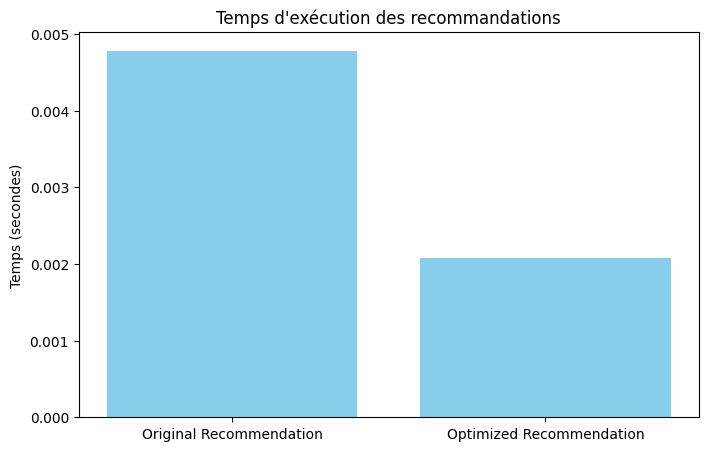

Original Recommendations: ['life', 'crazyhead', 'cuckoo', 'derek', 'derri girl', 'flower', 'load', 'man', 'man like mobeen', 'meet adebanjo']
Optimized Recommendations: ['life', 'crazyhead', 'cuckoo', 'derek', 'derri girl', 'flower', 'load', 'man', 'man like mobeen', 'meet adebanjo']


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Étape 1 : Préparation et nettoyage des données
data = data[['Title', 'Genres']].dropna()  # Garde uniquement les colonnes pertinentes et supprime les lignes vides
data.reset_index(drop=True, inplace=True)  # Réinitialise les index

# Vectorisation TF-IDF sur les genres
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(data['Genres'])

# Calcul de la matrice de similarité
similarity_matrix = cosine_similarity(tfidf_matrix)

# Mapping des titres aux indices
indices = pd.Series(data.index, index=data['Title']).drop_duplicates()

# Étape 2 : Implémentation des recommandations optimisées
from sklearn.cluster import KMeans # Import KMeans from sklearn.cluster
n_clusters = 10  # Choix du nombre de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Fonction améliorée pour les recommandations
def optimized_netflix_recommendation(title, data, similarity_matrix):
    index = indices[title]  # Trouve l'index du titre
    cluster_id = data.loc[index, 'Cluster']  # Trouve le cluster du titre
    cluster_data = data[data['Cluster'] == cluster_id]  # Sélectionne les titres dans le même cluster
    cluster_indices = cluster_data.index.tolist()
    cluster_similarity = similarity_matrix[index][cluster_indices]  # Similarité au sein du cluster

    similarity_scores = sorted(
        zip(cluster_indices, cluster_similarity), key=lambda x: x[1], reverse=True
    )
    top_indices = [i[0] for i in similarity_scores[:10]]
    return data.loc[top_indices, 'Title']

# Étape 3 : Mesure des performances
import time

start_time = time.time()
original_recommendations = netFlix_recommendation("flower")
original_time = time.time() - start_time

start_time = time.time()
optimized_recommendations = optimized_netflix_recommendation("flower", data, similarity_matrix)
optimized_time = time.time() - start_time

# Étape 4 : Visualisation des gains
times = [original_time, optimized_time]
labels = ['Original Recommendation', 'Optimized Recommendation']

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color='skyblue')
plt.title('Temps d\'exécution des recommandations')
plt.ylabel('Temps (secondes)')
plt.show()

# Afficher les résultats de recommandations
print("Original Recommendations:", original_recommendations.tolist())
print("Optimized Recommendations:", optimized_recommendations.tolist())


Dans l'approche originale, le calcul de la similarité implique de comparer l'élément cible à tous les éléments de l'ensemble de données, ce qui augmente le temps d'exécution.
Avec le regroupement, la recherche est limitée à un sous-ensemble spécifique (regroupement) d'éléments similaires, ce qui réduit le nombre de comparaisons et donc le temps d'exécution.
Efficacité informatique :

En regroupant au préalable les éléments en grappes, le système évite les calculs redondants pour les éléments non pertinents, ce qui a un impact direct sur la vitesse du processus de recommandation.
Performance en temps réel :

Le système optimisé peut générer des recommandations plus rapidement, ce qui le rend plus adapté aux applications en temps réel où l'expérience de l'utilisateur dépend d'une faible latence.
